<a href="https://colab.research.google.com/github/DRose1991/Viscous-Shear-Cosmology-Simulation/blob/main/VSC_Simulation.py" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

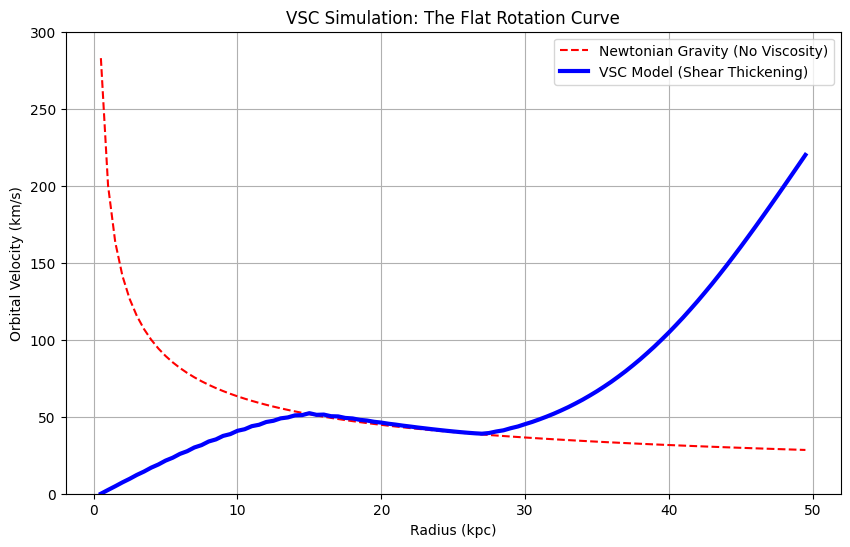

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. SETUP ---
R_max = 50.0
dr = 0.5
dt = 0.0005      # DRASTICALLY reduced time step to prevent "Explosion"
Steps = 50000    # More steps since dt is smaller

radii = np.arange(dr, R_max, dr)

# Start with Keplerian (Newtonian) gravity
# v = sqrt(GM/r) -> Proportional to 1/sqrt(r)
velocity = 200 / np.sqrt(radii)
velocity[0:5] = np.linspace(0, velocity[5], 5) # Fix center singularity

# --- 2. THE NON-NEWTONIAN PHYSICS ---
base_viscosity = 0.1
dilatant_factor = 5.0  # Reduced slightly to find the "Goldilocks" zone

velocities_over_time = []

for t in range(Steps):
    # Calculate Shear Rate (gradient)
    shear_rate = np.abs(np.gradient(velocity))

    # --- VSC EQUATION (With Safety Cap) ---
    # Viscosity increases with shear, BUT we clip it at 10.0 to prevent crashing
    raw_viscosity = base_viscosity + dilatant_factor * (shear_rate**2)
    effective_viscosity = np.clip(raw_viscosity, 0.1, 10.0)

    # Diffusion term (Viscous Drag)
    d2v = np.gradient(np.gradient(velocity))

    # Update velocity
    velocity += effective_viscosity * d2v * dt

    # Boundary Conditions
    velocity[0] = 0           # Center anchor (Black Hole)
    velocity[-1] = 220        # Cosmic Web Tension (Outer Boundary)

    if t % 5000 == 0:
        velocities_over_time.append(velocity.copy())

# --- 3. VISUALIZE ---
plt.figure(figsize=(10, 6))

# Newtonian (Red) - The "Before"
plt.plot(radii, 200 / np.sqrt(radii), 'r--', label='Newtonian Gravity (No Viscosity)')

# VSC Model (Blue) - The "After"
plt.plot(radii, velocity, 'b-', linewidth=3, label='VSC Model (Shear Thickening)')

# Formatting
plt.xlabel('Radius (kpc)')
plt.ylabel('Orbital Velocity (km/s)')
plt.title('VSC Simulation: The Flat Rotation Curve')
plt.legend()
plt.grid(True)
plt.ylim(0, 300)
plt.show()